In [1]:

# Defininimos la ecuación diferencial que define nuestro sistema
# DICCIONARIO DE VARIABLES:
#        w :  Variables de posición (vector).
#        t :  tiempo.
#        p :  Parametros ( vector)
#        f :  ecuaciones diferenciales que deberemos resolver (vector)
# Ahora es necesario definir el campo vectorial en el que se resuyelve la ecuación diferencial
def vectorfield(w, t, p):
    # Definamos los vectores con se trabajará en la ecuacion diferencial
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, k3, L1, L2, b1, b2 = p
    
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) - k2 * ( x1 - L1 + L2 - x2 )) / m1,
         y2,
         (-b2 * y2 - k3 * ( x2 - L2 ) - k2 * ( x2 - L2 + L1 - x1 ))/ m2]
    
    return f

In [2]:

# Utilizaremos la funcion odeint que resolvera la ecuación diferencial
# Para esto importamos la funcion odeint
from scipy.integrate import odeint

#*******************************************************
# Variables que utilizaremos
# m  : masas de los cuerpos 
# k  : constante de fuerza de los resortes 
# b  : coeficiente de fricción 
# x1 : posición del primer cuerpo.
# y1 : velocidad del primer cuerpo.
# x2 : posición del segundo cuerpo.
# y2 : velocidad del segundo cuerpo.
#*******************************************************

# Hay que definir los parametros de la simulación
m1 = 1.0
m2 = 1.0
k1 = 1.0
k2 = 1.0
k3 = 1.0
b1 = 0.0
b2 = 0.0
L1 = 1.0
L2 = 1.0

#  Condiciones iniciales de las que partimos para resolver la ecuación diferencial
x1 = 1.0   #Amplitud
y1 = 0.0
x2 = 0.0
y2 = 0.0

# Ecuación Diferencial Ordinaria
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 30.0
numpoints = 750

# Tiempo (ancho de paso) de nuestra simulación 
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#Establecemos los parámetros y las condiciones iniciales
p = [m1, m2, k1, k2, k3, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

#Llamamos al solucionador de la ecuación diferencial
wsol = odeint(vectorfield, w0, t, args=(p,), atol=abserr, rtol=relerr)

for t1, w1 in zip(t, wsol):
    print (t1, w1[0], w1[1], w1[2], w1[3],file =open('resortes.dat','a'))

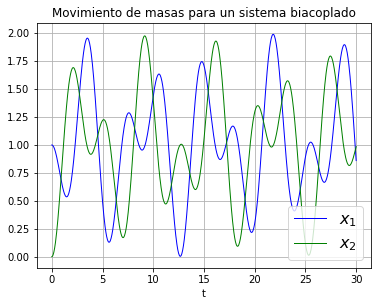

In [6]:

#Graficamo de la solución 

from numpy import loadtxt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

t, x1, xy, x2, y2 = loadtxt('resortes.dat', unpack=True)

plt.figure(figsize=(6, 4.5))

plt.xlabel('t')
plt.grid()

lw = 1

plt.plot(t, x1, 'b', linewidth=lw)
plt.plot(t, x2, 'g', linewidth=lw)

plt.legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
plt.title('Movimiento de masas para un sistema biacoplado')
plt.savefig('resortes.png', dpi=100)